# KMeans v2 with PCA-reduced features, full cohort

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.cluster import k_means_elbow_analysis, silhouette_analysis, fit_kmeans

## Read in scaled features

In [2]:
df = pd.read_csv("../data/cohort_features_pca_v2_full_cohort.csv", index_col="ID")
df.head(5)

,PC1,PC2
ID,,
0,-9.032719,11.830255
1,-8.036862,-0.142470
2,-7.746563,-0.244233
3,-9.037547,-0.233491
4,-8.751107,-3.319406


## Parameter exploration

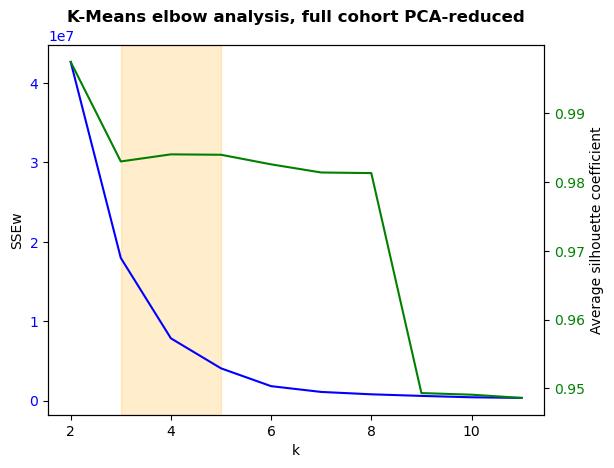

    k         sse_w  silhouette
0   2  4.266696e+07    0.997455
1   3  1.796409e+07    0.982986
2   4  7.838743e+06    0.984018
3   5  4.057453e+06    0.983958
4   6  1.810480e+06    0.982565
5   7  1.084383e+06    0.981381
6   8  7.835415e+05    0.981293
7   9  5.830775e+05    0.949314
8  10  4.099731e+05    0.949079
9  11  3.291474e+05    0.948610


In [3]:
"""
Use the elbow method to determine the "k", number of clusters
"""
# Determine the range of k values to analyse
k_max = 11
k_list = np.linspace(1, k_max, 11, dtype=int)[1:]

k_means_elbow_analysis(
    k_list, df,
    title=f"K-Means elbow analysis, full cohort PCA-reduced"
)

For k = 3 The average silhouette_score is : 0.9829863944519733
For k = 4 The average silhouette_score is : 0.9840178077484263
For k = 5 The average silhouette_score is : 0.9839578982204649


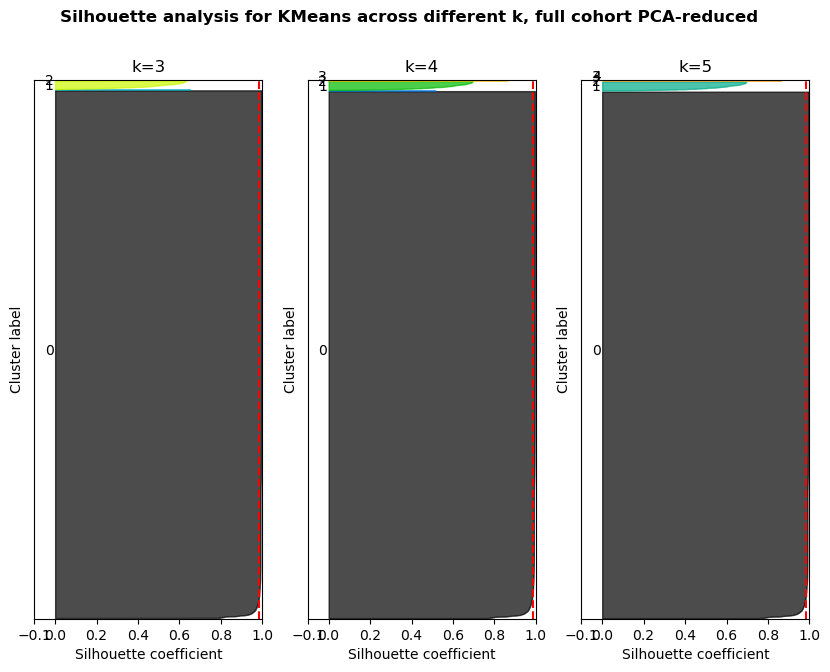

In [4]:
"""
Deep dive selected values of k

Below analysis is adapted from:
https://scikit-learn.org/0.24/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
"""

range_k = [3, 4, 5]

silhouette_analysis(
    range_k, df,
    title=f"Silhouette analysis for KMeans across different k, full cohort PCA-reduced"
)

## Assign the clusters

In [5]:
k = 4
_, kmeans = fit_kmeans(args=(k, df))
assigned_clusters = pd.DataFrame(kmeans.predict(df), columns=["cluster"])
assigned_clusters.index.name = "ID"
assigned_clusters.to_csv(f"../data/cohort_clusters_kmeans_{k}_v2_pca_full_cohort.csv")
assigned_clusters

,cluster
ID,
0,0
1,0
2,0
3,0
4,0
...,...
9475,0
9476,0
9477,0


In [6]:
assigned_clusters.value_counts()

cluster
0          9319
2           157
1             2
3             2
dtype: int64

## Generate the COS

In [7]:
# Get the cluster label for COS
cos_label = assigned_clusters.value_counts().index[0][0]
cos_label

0

In [8]:
df_cluster = pd.merge(left=df, right=assigned_clusters, on="ID")
cos = df_cluster[df_cluster["cluster"] == cos_label].drop(columns=["cluster"])
cos.to_csv("../data/cos_pca_kmeans_v2_full_cohort.csv")
cos

,PC1,PC2
ID,,
0,-9.032719,11.830255
1,-8.036862,-0.142470
2,-7.746563,-0.244233
3,-9.037547,-0.233491
4,-8.751107,-3.319406
...,...,...
9475,-7.750627,-0.268780
9476,-8.894564,-0.180325
9477,-9.036627,-0.244871


In [9]:
df_cluster

,PC1,PC2,cluster
ID,,,
0,-9.032719,11.830255,0
1,-8.036862,-0.142470,0
2,-7.746563,-0.244233,0
3,-9.037547,-0.233491,0
4,-8.751107,-3.319406,0
...,...,...,...
9475,-7.750627,-0.268780,0
9476,-8.894564,-0.180325,0
9477,-9.036627,-0.244871,0


/var/folders/97/8lyvqyzd5bsfdkzn8pwdymb00000gn/T/ipykernel_13668/3267395570.py:6: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(df_cluster, x="PC1", y="PC2", hue="cluster", ax=ax, palette=pal)


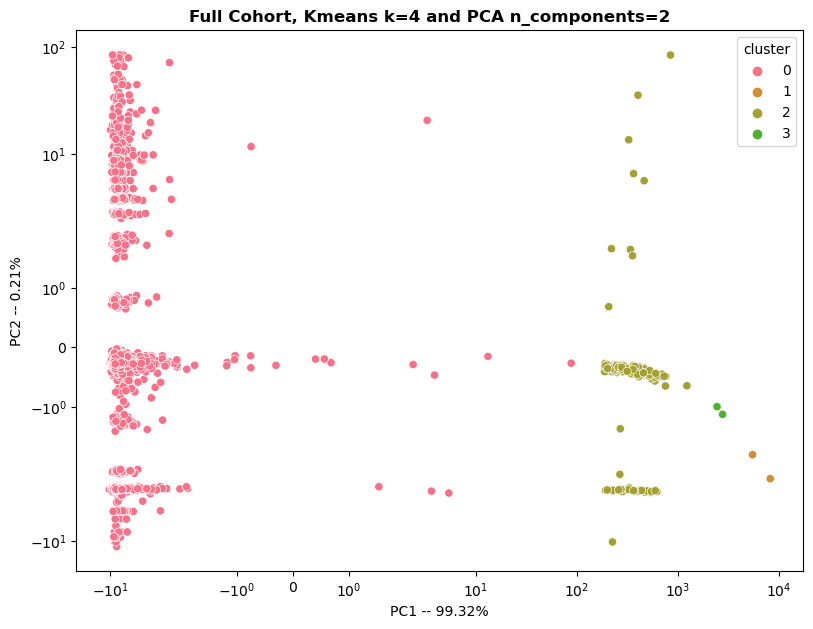

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
fig.tight_layout()

pal = sns.color_palette("husl", 9)
sns.scatterplot(df_cluster, x="PC1", y="PC2", hue="cluster", ax=ax, palette=pal)

ax.set_xscale("symlog")
ax.set_yscale("symlog")
ax.set_xlabel(f"PC1 -- 99.32%")
ax.set_ylabel(f"PC2 -- 0.21%")

fig.suptitle("Full Cohort, Kmeans k=4 and PCA n_components=2",
             fontweight="semibold", y=1.0)

plt.show()